# Transfer Learning

## Import Packages

In [1]:
# !pip uninstall ml_project_util -y
# !pip install git+https://github.com/aris-gk3/ml_project_util.git
# or for local development:
# %pip uninstall ml_project_util -y
%pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# My package imports
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head
from ml_project_util.model_evaluation import model_evaluation_precise
from ml_project_util.history import concatenate_json, plot_json

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-mi4_ehul
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-mi4_ehul
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit cb04cae83ee57d134658765811e153245b1cf241
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22731 sha256=effe0d99ef7c6ca89dcaf5dd509d92b0d2283cff31949a4c52e1144be09fa27b
  Stored in directory: /tmp/pip-ephem-wheel-cache-14crigqd/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util
Note: you may need to restart the kernel to use updated packages.


2025-06-19 06:34:39.463333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750314879.645931      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750314879.699276      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='stanford-dogs-restructured') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: stanford-dogs-restructured


## Define the Model

In [3]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(120, activation='softmax'))  # 120 dog breeds in Stanford Dogs

# # Alternative head
# model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(120, activation='softmax'))  # 120 dog breeds in Stanford Dogs

I0000 00:00:1750314894.202091      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

I0000 00:00:1750314912.582559      91 service.cc:148] XLA service 0x7c67c400ee30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750314912.583311      91 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750314912.995473      91 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/310 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.0234 - loss: 18.7330   

I0000 00:00:1750314921.410133      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.0411 - loss: 6.3286
Epoch 1: saving model to /kaggle/working/SavedModels/SD1/SD1_P1_001_val2.8601.keras
310/310 ━━━━━━━━━━━━━━━━━━━━ 139s 413ms/step - accuracy: 0.0412 - loss: 6.3236 - val_accuracy: 0.3005 - val_loss: 2.8601
Epoch 2/30
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.2173 - loss: 3.3220
Epoch 2: saving model to /kaggle/working/SavedModels/SD1/SD1_P1_002_val1.7556.keras
310/310 ━━━━━━━━━━━━━━━━━━━━ 118s 381ms/step - accuracy: 0.2174 - loss: 3.3213 - val_accuracy: 0.5103 - val_loss: 1.7556
Epoch 3/30
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.3439 - loss: 2.5262
Epoch 3: saving model to /kaggle/working/SavedModels/SD1/SD1_P1_003_val1.4453.keras
310/310 ━━━━━━━━━━━━━━━━━━━━ 119s 384ms/step - accuracy: 0.3439 - loss: 2.5260 - val_accuracy: 0.5712 - val_loss: 1.4453
Epoch 4/30
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.4101 - loss: 2.1794
Epoch 4: saving model to /kaggle/working/Sav

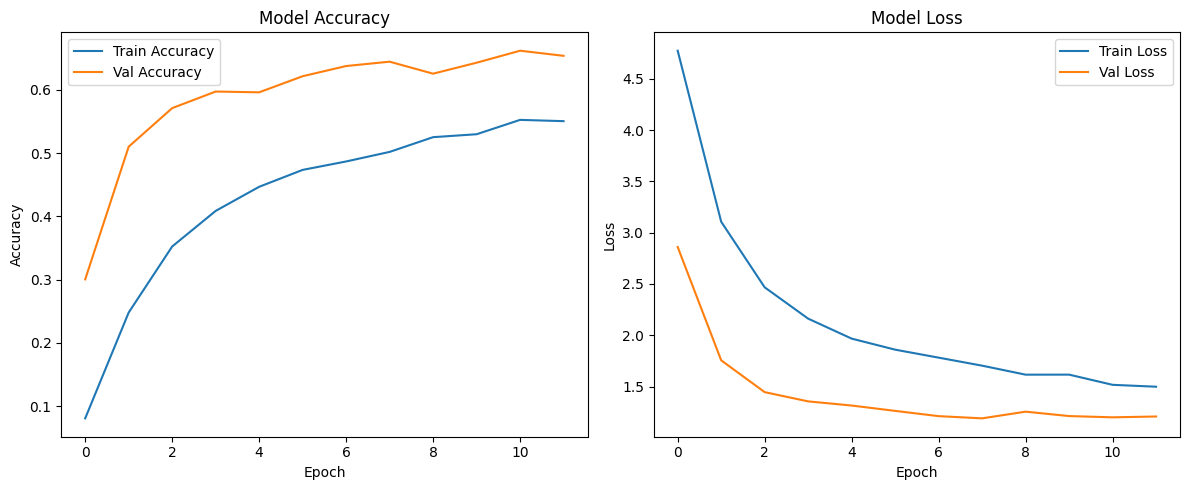

In [4]:
model_name = 'SD1_P1'
epochs = 30
lr = 1e-3
optimizer = 'Adam'

# # Previous Data Augmentation
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#     layers.RandomContrast(0.1)
# ], name="data_augmentation")

# Alternative Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),      # was 0.1
    layers.RandomZoom(0.05),          # was 0.1
    layers.RandomContrast(0.05)       # was 0.1
])

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [5]:
model_evaluation_precise(model)

Found 8183 files belonging to 120 classes.
Start evaluating batches
Batch Number: 156
Precise test accuracy: 0.65744
Precise test loss: 1.24151


(0.65744424, 1.2415080680007673)

In [6]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(120, activation='softmax'))  # 120 dog breeds in Stanford Dogs

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

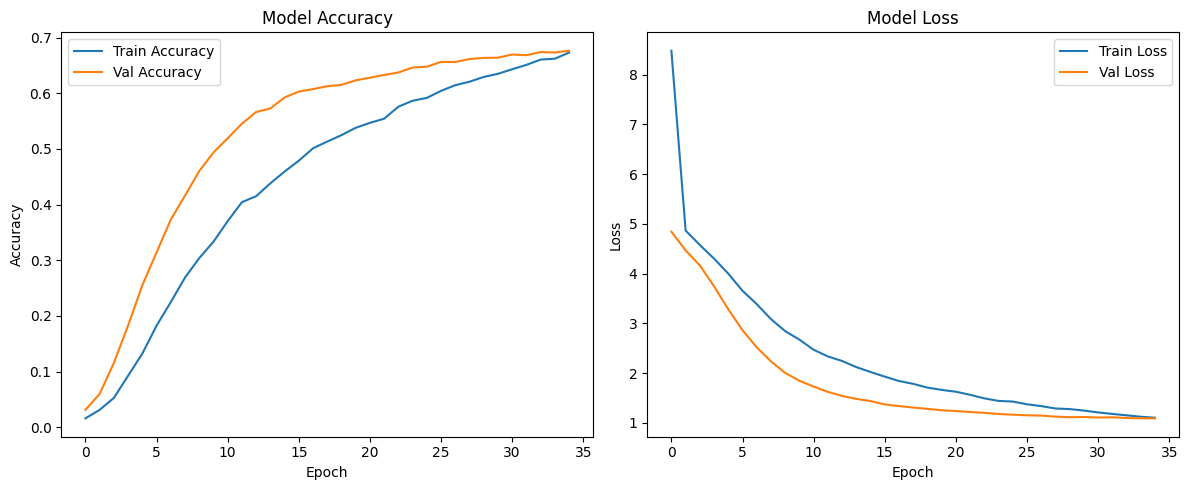

In [7]:
epochs = 35
lr = 1e-4
optimizer = 'Adam'
name = 'SD1_P2'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [8]:
model_evaluation_precise(model)

Found 8183 files belonging to 120 classes.
Start evaluating batches
Batch Number: 156
Precise test accuracy: 0.68432
Precise test loss: 1.10002


(0.68431526, 1.1000206351909003)

In [9]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(120, activation='softmax'))  # 120 dog breeds in Stanford Dogs

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

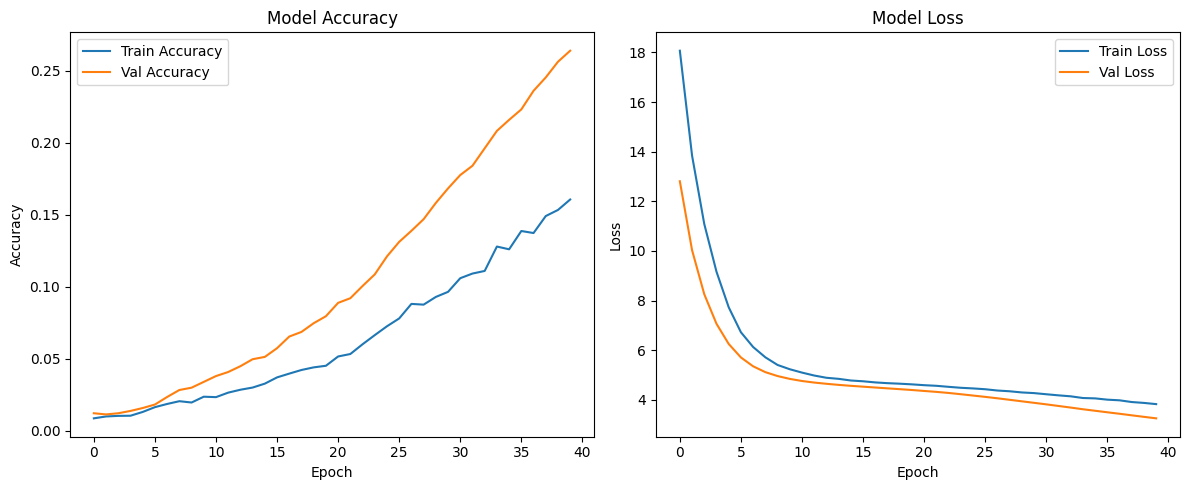

In [10]:
epochs = 40
lr = 1e-5
optimizer = 'Adam'
name = 'SD1_P3'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [11]:
model_evaluation_precise(model)

Found 8183 files belonging to 120 classes.
Start evaluating batches
Batch Number: 156
Precise test accuracy: 0.27627
Precise test loss: 3.23479


(0.27627388, 3.2347902150670436)

## Interactively Train the Model

In [12]:
# vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# model = models.Sequential()
# for layer in vgg_base.layers:
#     model.add(layer)
# # Adding the new head
# model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))       
# model.add(layers.Dense(17, activation='softmax'))

In [13]:
# model_name1 = 'EG1_P1'
# epochs = 15
# lr = 1e-3
# optimizer = 'Adam'

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#     layers.RandomContrast(0.1)
# ], name="data_augmentation")

# freeze_layers(model, verbose=1)
# unfreeze_head(model, verbose=1)
# train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=False)

In [14]:
# model_evaluation_precise(model)

In [15]:
# model_name2 = 'EG1_P1_2'
# epochs = 5
# train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation=data_augmentation)

In [16]:
# relpath1 = f"{PATH_RAWDATA}/{model_name1}.json"
# relpath2 = f"{PATH_RAWDATA}/{model_name2}.json"
# output_filename = f"{model_name1}_a"
# concatenate_json(relpath1, relpath2, output_filename)
# plot_json(json_name=output_filename, img_name=output_filename, data_type='joined')

In [17]:
# model_evaluation_precise(model)